In [1]:
import pandas as pd

directory = "./raw_data"
df_Sentiment140 = pd.read_csv(directory + "/General Sentence_Sentiment140.csv", header = None, engine = "python")
df_Sentiment140 = df_Sentiment140[[0, 5]]
df_Sentiment140.columns = ["label","text"]
df_Sentiment140.loc[df_Sentiment140["label"] == 4, "label"] = 1 

In [2]:
def read_news(file_path):
    with open(file_path,'r+',encoding = 'utf-8') as f:
        s = [i[:-1].split(' ',1) for i in f.readlines()]
    data = pd.DataFrame(s[1:],columns = ["label", "text"])
    return data

df_amz = read_news(directory + "/General Sentence_Amazon Review_train")
df_amz_2 = read_news(directory + "/General Sentence_Amazon Review_test")
df_amz = df_amz.append(df_amz_2)

df_amz.loc[df_amz["label"] == "__label__2", "label"] = 1
df_amz.loc[df_amz["label"] == "__label__1", "label"] = 0

# 1) Explore and remove noisy data of each dataset
    i) Non-English sentence

    ii) advertisement
    
    iii) noisy sentence pattern

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

def extract_pattern(X, n = 1, n_c = 50):
    '''
    Ihis function explore the most fequently appeared n-gram pattern and return a dataframe containing the most 
    frequenctly appeared grams in the input
    Input: 
        X: dataset where all string are stored in the column "text"
        n: number of n, i.e. 1,2,3,...
        n_c: number of most common grams to check
    Output: 
        df: A dataframe that contain the gram and corresponding frequency
    '''
    text = " ".join(X.text) #join all sentence tgt
    grams = word_tokenize(text) #tokenize the text
    grams = ngrams(grams, n) #creat n-gram from the tokenized text
    grams = [' '.join(gram) for gram in grams]
    most_occur = Counter(grams).most_common(n_c) # count the occurance of those grams
    df = pd.DataFrame(most_occur, columns = ["word", "Percentage"])    # store the statistics into a dataframe
    df["Percentage"] = df["Percentage"]*100/X.shape[0]
    return df

In [4]:
extract_pattern(df_Sentiment140, 10)

,word,Percentage
0,! ! ! ! ! ! ! ! ! !,0.800250
1,? ? ? ? ? ? ? ? ? ?,0.661500
2,Once you add everyone you are on the train or,0.092750
3,you add everyone you are on the train or pay,0.092750
4,add everyone you are on the train or pay vip,0.092750
5,Get 100 followers a day using www.tweeteradder...,0.051875
6,100 followers a day using www.tweeteradder.com...,0.051875
7,followers a day using www.tweeteradder.com Onc...,0.051875
8,a day using www.tweeteradder.com Once you add ...,0.051875
9,day using www.tweeteradder.com Once you add ev...,0.051875


In [5]:
# search if any data has specific word by RegEx; demonstration 
df_Sentiment140[df_Sentiment140['text'].str.match('.*Once you add everyone you are on the train or.*') == True] 

,label,text
1374654,1,@feiyie Get 100 followers a day using www.twee...
1374667,1,@karl09 Get 100 followers a day using www.twee...
1374673,1,@bflint Get 100 followers a day using www.twee...
1374680,1,@natallon Get 100 followers a day using www.tw...
1374691,1,@blakmanpromo Get 100 followers a day using ww...
...,...,...
1569619,1,@helldognj Get 100 followers a day using www.t...
1569629,1,@ceciandlace82 Get 100 followers a day using w...
1569637,1,@richj4you Get 100 followers a day using www.t...
1569645,1,@offcialxmshae Get 100 followers a day using w...


In [6]:
df_Sentiment140[df_Sentiment140['text'].str.match('.*I am lost. Please help me find a good.*') == True] 

,label,text
43935,0,@NyleW I am lost. Please help me find a good h...
45574,0,@SallyD I am lost. Please help me find a good ...
46919,0,@zuppaholic I am lost. Please help me find a g...
47949,0,@LOSTPETUSA I am lost. Please help me find a g...
50572,0,@JeanLevertHood I am lost. Please help me find...
...,...,...
792409,0,@trooppetrie I am lost. Please help me find a ...
793314,0,@Carly_FTS I am lost. Please help me find a go...
793610,0,@inathlone I am lost. Please help me find a go...
798608,0,@Kram I am lost. Please help me find a good ho...


In [7]:
df_Sentiment140[df_Sentiment140['text'].str.match('.*why limit your story to 140 ch. Tell all.*') == True] 

,label,text
1141626,1,@cadmiumcannibal why limit your story to 140 c...
1162939,1,@harry_matthews why limit your story to 140 ch...
1169791,1,@eloquentembrace why limit your story to 140 c...
1173614,1,@hapaxes why limit your story to 140 ch. Tell ...
1174701,1,@cmgoodwin why limit your story to 140 ch. Tel...
...,...,...
1493342,1,@stealingiseasy why limit your story to 140 ch...
1493469,1,@swedenducrozet why limit your story to 140 ch...
1503170,1,@cofemkr40927 why limit your story to 140 ch. ...
1504094,1,@kookijhe why limit your story to 140 ch. Tell...


In [8]:
# remove data which is either advetisment or Non-English 
df_Sentiment140 = df_Sentiment140[df_Sentiment140['text'].str.match('.*Once you add everyone you are on the train or.*') != True]
df_Sentiment140 = df_Sentiment140[df_Sentiment140['text'].str.match('.*I am lost. Please help me find a good.*') != True]
df_Sentiment140 = df_Sentiment140[df_Sentiment140['text'].str.match('.*why limit your story to 140 ch. Tell all.*') != True]
    

In [9]:
extract_pattern(df_Sentiment140, 8)

,word,Percentage
0,! ! ! ! ! ! ! !,1.126529
1,? ? ? ? ? ? ? ?,0.784984
2,! ! ! ! ! ! ! @,0.051823
3,& lt ; 3 & lt ; 3,0.027351
4,( ( ( ( ( ( ( (,0.025223
5,& gt ; & gt ; & gt,0.023220
6,gt ; & gt ; & gt ;,0.023220
7,# seb-day # seb-day # seb-day # seb-day,0.022469
8,seb-day # seb-day # seb-day # seb-day #,0.020404
9,! ! ! ! ! ! ! I,0.018589


In [10]:
df_Sentiment140[df_Sentiment140['text'].str.match('.*..follow me..its just that simple.*') == True] 

,label,text
949801,1,@Rodgersaabeca if you like 2 laugh..follow me...
949854,1,@Jazzy_IAm if you like 2 laugh..follow me..it...
949874,1,@bZPhotographer if you like 2 laugh..follow m...
949911,1,@LilShawtySwagg if you like 2 laugh..have a go...
949926,1,@Tweety317 if you like 2 laugh..have a good ti...
...,...,...
1366082,1,@NolaLadyLove if you like to laugh..follow me....
1497105,1,@GabyColon if you like to laugh....have a goo...
1497747,1,@MusicLover5391 if you like to laugh....have a...
1498618,1,@ClassicRabbit if you like to laugh....have a ...


In [11]:
df_Sentiment140 = df_Sentiment140[df_Sentiment140['text'].str.match('.*�.*') != True] #found advetisment
df_Sentiment140 = df_Sentiment140[df_Sentiment140['text'].str.match('.*..follow me..its just that simple.*') != True] #found advetisment

In [12]:
extract_pattern(df_Sentiment140, 5)

,word,Percentage
0,! ! ! ! !,2.391676
1,? ? ? ? ?,1.043065
2,! ! ! ! @,0.267612
3,& lt ; 3 @,0.194695
4,! & lt ; 3,0.123349
5,! ! ! ! I,0.121716
6,I do n't want to,0.093328
7,& amp ; & amp,0.075743
8,amp ; & amp ;,0.075743
9,ca n't wait to see,0.066259


In [17]:
from sklearn.model_selection import train_test_split 
A, B = train_test_split(df_amz, test_size=0.2, random_state = 2046) # due to RAM limitation
extract_pattern(B, 10)

,word,Percentage
0,! ! ! ! ! ! ! ! ! !,3.794750
1,* * * * * * * * * *,0.229625
2,! ! ! ! ! ! ! ! ! :,0.199125
3,? ? ? ? ? ? ? ? ? ?,0.183000
4,-- -- -- -- -- -- -- -- -- --,0.086000
5,! ! ! ! ! ! ! ! : I,0.059000
6,! ! ! ! ! ! ! ! : This,0.043250
7,# # # # # # # # # #,0.025125
8,Bad Bad Bad Bad Bad Bad Bad Bad Bad Bad,0.022250
9,! ! ! ! ! ! ! : This is,0.018875


In [21]:
B[B['text'].str.match('.*Don\'t waste your money on this one.*') == True] 

,label,text
3491980,0,Disappointed: This item is nothing like the pi...
79855,0,What a piece of JUNK!: I have always trusted O...
1112463,0,Just Not A Good Buy!: I purchased the RCA Shel...
78307,0,Celtic Woman - The Greatest Journey Essential ...
1605742,0,Boring: I received this book for Christmas. Ba...
...,...,...
2705930,0,"Bad, bad, bad. Don't waste your money on this ..."
745688,0,Horrible: The whole movie is just Horrible. Vi...
282227,0,Don't waste your money on this one...: I autom...
3186980,0,Don't waste your money on this one !: Caveat E...


#---- &---- @---- repeated punctuation http rt(retweet)

In [57]:
import re
import string

#create global variables for data cleaning
#punctuation that going to remove
p = string.punctuation 
keep_p = ["!", "\"", "#", "&", "\'", ",", ".", ":", ";", "?", "@"] # These is to keep/ useful to remove speical pattern later
for i in keep_p:
    p = p.replace(i, "") 

#speical word to be removed
sp_word = ["^rt$", "^#.*","^@.*", "^http.*", "^www\..*", "^&.*", "^;d$", "^;D$", "^;p$", "^;P$", "^:d$", "^:D$",
           "^:p$", "^:P$", "^xd$", "^xp$", "^XD$", "^XP$", "^xD$", "^xP$", "^Xd$", "^Xp$"]

In [58]:
def data_cleaning(sentence):
    
    # react with special pattern discovered in pervious step
    sentence = re.sub('!+', "!", sentence)
    sentence = re.sub('\"+', "\"", sentence)
    sentence = re.sub('#+', " #", sentence)
    sentence = re.sub('&+', " &", sentence)
    sentence = re.sub('\'+', "'", sentence)
    sentence = re.sub(' \'+', "'", sentence)
    sentence = re.sub(',+', ",", sentence)
    sentence = re.sub('\.+', ".", sentence)
    sentence = re.sub(':+', ":", sentence)
    sentence = re.sub(';+', ";", sentence)
    sentence = re.sub('\?+', "?", sentence)
    sentence = re.sub('@+', " @", sentence)
    sentence = re.sub('(\?!)+', "?!", sentence)
    sentence = re.sub('http', " http", sentence)
    sentence = re.sub('www\.', " www.", sentence)
    
    # Filter out the word did't in the punctuation removal list
    sentence = "".join([j for j in sentence if j not in p]) 
    
    # remove words in special pattern lists
    words = sentence.split()
    for i in range(len(words)):
        for j in sp_word:
            words[i] = re.sub(j, "", words[i])
    
    # join back the sentence
    cleaned_text = " ".join([k for k in words])
    
    # remove duplicate space
    cleaned_text = re.sub(' +', " ", cleaned_text)
    return cleaned_text 

In [63]:
df = pd.concat([df_amz, df_Sentiment140], ignore_index=True)

In [64]:
df.text = df.text.apply(data_cleaning)

# 2) Sentence Pre-Processing
    i) convert to lower case;

    ii) remove stop word;
    
    iii) Lemmatization

In [74]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

lemmatizer = WordNetLemmatizer()

#stop word to be removed
stop_words = stopwords.words('english')
keep_w = ['against', 'up', 'down', 'over', 'under', 'no', 'not', 'same', 'above', 'below', 'only']
for i in keep_w:
     stop_words.remove(i) #inplace function

def nltk_tag_to_wordnet_tag(nltk_tag):
    '''
    This function convert nltk POS tagging to wordnet tagging. 
    Will be used inside data_lemmatization function
    input: 
        nltk_tag: the nltk_tag that tagged for a particular word with nltk package
    output:
        wordnet tagging or NONE if no corresponding tagging found
    '''
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def data_preprocessing(sentence):
    
    sentence = sentence.lower()
    words = sentence.split()
    words = [w for w in words if w not in stop_words]
    sentence = " ".join([k for k in words])
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    # create tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token without changing
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)

In [77]:
df.text = df.text.apply(data_preprocessing)

In [78]:
#df.to_csv("df_after_preprocessing")

In [33]:
import pandas as pd
df = pd.read_csv("df_after_preprocessing", index_col= 0 )

/Users/andrewyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 3) EDA

In [34]:
import numpy as np 
# Calculate the lenght of tokens in each row

def Count_token(X):
    '''
    This function is to count the token of each data on the dataframe
    Input: 
        X: DataFrame, hvaing a column called "text", to be count
    Output:
        Count_token: An array that contain the numbere of token in each row.
    '''
    
    X = X.text.to_numpy()
    Token_Count = np.zeros((X.shape[0],1)) # initialize Token_Count as all 0
    for i in range(X.shape[0]):  
        sentence_words = X[i].split()
        Token_Count[i] = len(sentence_words)
    return Token_Count

In [35]:
df.text = df.text.astype(str)

In [36]:
df["Token_Count"] = Count_token(df)

In [37]:
# function to perform descriptive statistics on number of token of each dataset
def tl_des_stat(X):
    '''
    This function is to calculate the descriptive statistics of the tokens length from different scource.
    The statistics include min, 25%, median, 75%, max, mean, sd, the number of data that exceed 1.5 IQR and 
    its corresponding percentge.
    THe Upper limit and Lower Limit, definded as +- 1.5IQR also listed
    Input:
        X: data set that have 2 columns, namely dataset and Token_Count.
    Output:
        df: a table that contain the descriptive statistics as mentioned above
    '''
    df = pd.DataFrame(columns=['min','1Q','median', '3Q', 'max', 'mean', 'std', 'extreme data', 'percentage', 'Upper', 'Lower'])
    
    a,b,c,d,e = X.Token_Count.quantile([0, 0.25, 0.5, 0.75, 1])
    f = X.Token_Count.mean()
    g = X.Token_Count.std()
    IQR = (d-b)*1.5 
    h1 = (X.Token_Count > IQR+d).sum()
    h2 = (X.Token_Count < b-IQR).sum()
    h = h1+h2
    j = h*100/X.shape[0]
    df = df.append(pd.DataFrame([[a,b,c,d,e,f,g,h,j, IQR+d, b-IQR]],columns=['min','1Q','median', '3Q', 'max', 'mean', 'std', 'extreme data', 'percentage', 'Upper', 'Lower']))
    return df

In [38]:
import seaborn as sns

d_s = tl_des_stat(df)
d_s

,min,1Q,median,3Q,max,mean,std,extreme data,percentage,Upper,Lower
0,1.0,15.0,33.0,61.0,296.0,40.769914,31.398612,18321,0.327615,130.0,-54.0


/Users/andrewyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


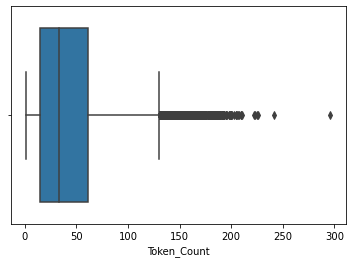

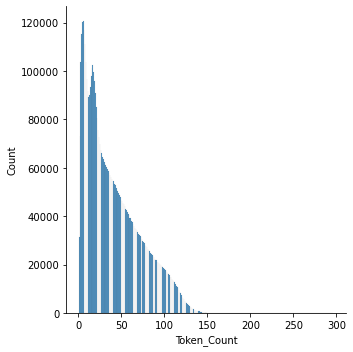

In [39]:
# boxplot and displot to perform data visualization
sns.boxplot(df.Token_Count)
sns.displot(df, x = "Token_Count")

 Therefore, we defind 130 word count as extremely long

In [40]:
df = df[(df.Token_Count <= d_s.Upper[0])]

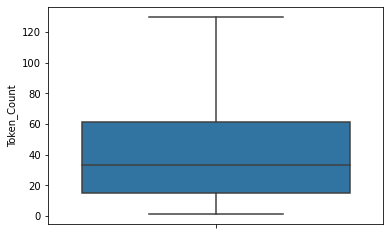

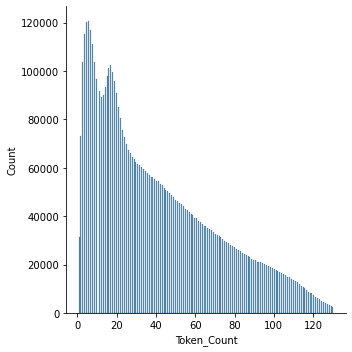

In [41]:
# boxplot and displot again to visualize the effect of outliner removal
sns.boxplot(y = df.Token_Count)
sns.displot(df, x = "Token_Count")

In [42]:
df.head()

,label,text,Token_Count
0,1,best soundtrack ever anything . : i 'm read lo...,61.0
1,1,"amaze ! : soundtrack favorite music time , han...",100.0
2,1,excellent soundtrack : truly like soundtrack e...,98.0
3,1,"remember , pull jaw floor hear it : played gam...",69.0
4,1,absolute masterpiece : quite sure actually tak...,90.0


Text(0.5, 1.0, '% of data having a positive sentiment')

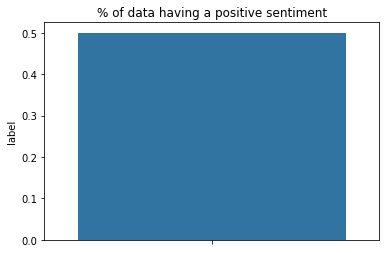

In [43]:
sns.barplot(y = df.label).set_title('% of data having a positive sentiment')

In [44]:
df.label.mean()*100

49.96237828109111

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def create_wordcloud(X, max_word = 200, n_occur = 20):
    '''
    This function is to create wordcloud for a array of text
    Input: 
        X: Dataframe, hvaing a column called "text", to create a wordcloud
        max_word: int, the maximun number of word the word cloud shows
        n_occur: int, the number of most occured word to be listed out
    Output:
        show a word cloud and print the a table showing the most n_occur of words
    '''
    
    X = X.text.to_numpy() #change to a array
    
    text = " ".join(X) # join all words sentence tgt
    
    wordcloud = WordCloud(max_words = max_word).generate(text) #generate word cloud
    plt.imshow(wordcloud,interpolation = 'bilinear')
    
    most_occur = Counter(text.split()).most_common( n_occur ) # create a table
    print("\n", pd.DataFrame(most_occur, columns = ["word", "frequency"]))

In [14]:
Negative = df[df.label == 0]
Postive = df[df.label == 1]

The most frequently appeared word for Negative sentiments are: 


      word  frequency
0       .    9367281
1       ,    5944774
2       :    2193822
3     not    1914044
4       !    1239171
5    book    1179791
6     get     851237
7     one     813977
8      's     740833
9    like     672211
10     ''     670457
11     ``     667490
12   good     614123
13  would     588338
14    buy     585729
15      i     564389
16     no     544384
17     it     532356
18   work     527504
19   time     513574


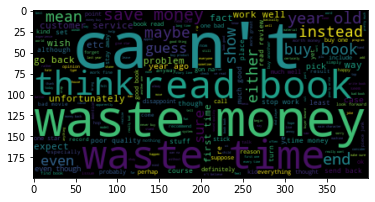

In [15]:
print("The most frequently appeared word for Negative sentiments are: \n")
create_wordcloud(Negative) 


 Alternatively, the most frequently appeared word for Positive sentiments are: 


      word  frequency
0       .    8329074
1       ,    5692529
2       :    2188654
3       !    1739720
4    book    1276904
5   great     966250
6     not     826842
7      's     826230
8    good     790369
9     one     782506
10    get     654837
11     ''     627118
12   like     626651
13     ``     618639
14   love     604551
15   read     536111
16     it     502514
17      i     495634
18   well     480028
19   make     462876


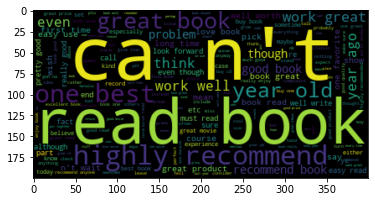

In [16]:
print("\n Alternatively, the most frequently appeared word for Positive sentiments are: \n")
create_wordcloud(Postive) 

In [48]:
df.iloc[:, 0:2].to_csv("df_before_modelling")